# Aprendizaje supervisado

# Arbol de decisión
## Se cargan las librerias necesarias para desarrollar el analisis y la base de datos con la que trabajaremos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

data= pd.read_csv ('Cleaned-Data.csv')
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


## Mostramos la informacion de las variables

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

## Hacemos un mapa de calor

<AxesSubplot:>

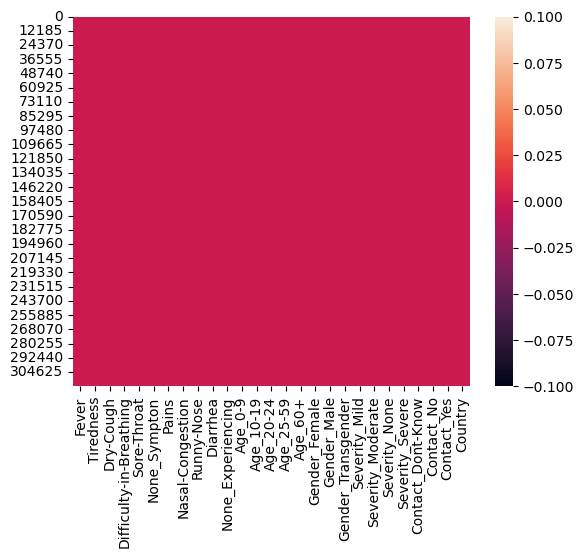

In [3]:
sns.heatmap(data.isnull())

In [4]:
null = data.isnull().sum()

## Visualizamos las columnas de nuestro dataset y hacemos limpieza

In [5]:
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [6]:
data.drop(['Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country', 'Severity_Mild', 'Severity_Moderate', 'Severity_None', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'None_Sympton'], axis = 1, inplace = True)
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_60+,Severity_Severe
0,1,1,1,1,1,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,1,0,0
2,1,1,1,1,1,1,1,1,1,0,0
3,1,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,1,1
316796,0,0,0,0,0,0,0,0,0,1,1
316797,0,0,0,0,0,0,0,0,0,1,0
316798,0,0,0,0,0,0,0,0,0,1,0


array([[<AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Tiredness'}>,
        <AxesSubplot:title={'center':'Dry-Cough'}>],
       [<AxesSubplot:title={'center':'Difficulty-in-Breathing'}>,
        <AxesSubplot:title={'center':'Sore-Throat'}>,
        <AxesSubplot:title={'center':'Pains'}>],
       [<AxesSubplot:title={'center':'Nasal-Congestion'}>,
        <AxesSubplot:title={'center':'Runny-Nose'}>,
        <AxesSubplot:title={'center':'Diarrhea'}>],
       [<AxesSubplot:title={'center':'Age_60+'}>,
        <AxesSubplot:title={'center':'Severity_Severe'}>, <AxesSubplot:>]],
      dtype=object)

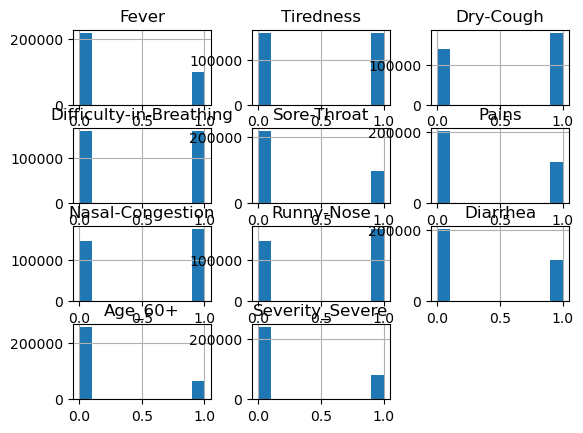

In [7]:
data.hist()

## dividimos los datos de entrenamiento y de prueba

In [8]:
train, test = train_test_split(data, test_size = 0.3, random_state=0)

In [9]:
pred = test.copy()

In [10]:
x_train = train.iloc[:, :19].values
x_test = test.iloc[:, :19].values

In [11]:
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values

## Funcion para medir el rendimiento

In [12]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

## Se crea el modelo del arbol de decision y se entrena

In [13]:
arbol = DecisionTreeClassifier()
arbol.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred_dt = arbol.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



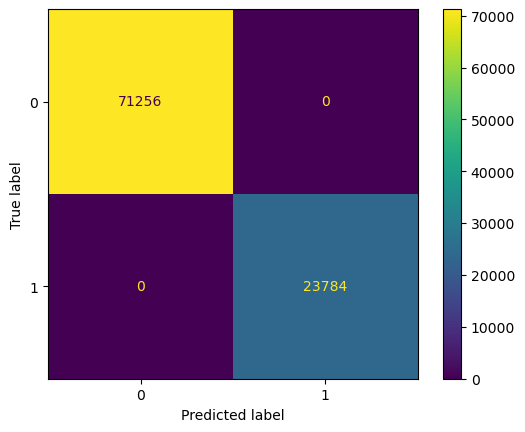

In [15]:
perform(y_pred_dt)

In [16]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040



## Visualizamos el arbol de decisión

In [17]:
feature_names = data.columns[0:11]
viz = data.copy()
viz["Severity_Severe"]=viz["Severity_Severe"].values.astype(str)
print(viz.dtypes)
target_names = viz['Severity_Severe'].unique().tolist()

Fever                       int64
Tiredness                   int64
Dry-Cough                   int64
Difficulty-in-Breathing     int64
Sore-Throat                 int64
Pains                       int64
Nasal-Congestion            int64
Runny-Nose                  int64
Diarrhea                    int64
Age_60+                     int64
Severity_Severe            object
dtype: object


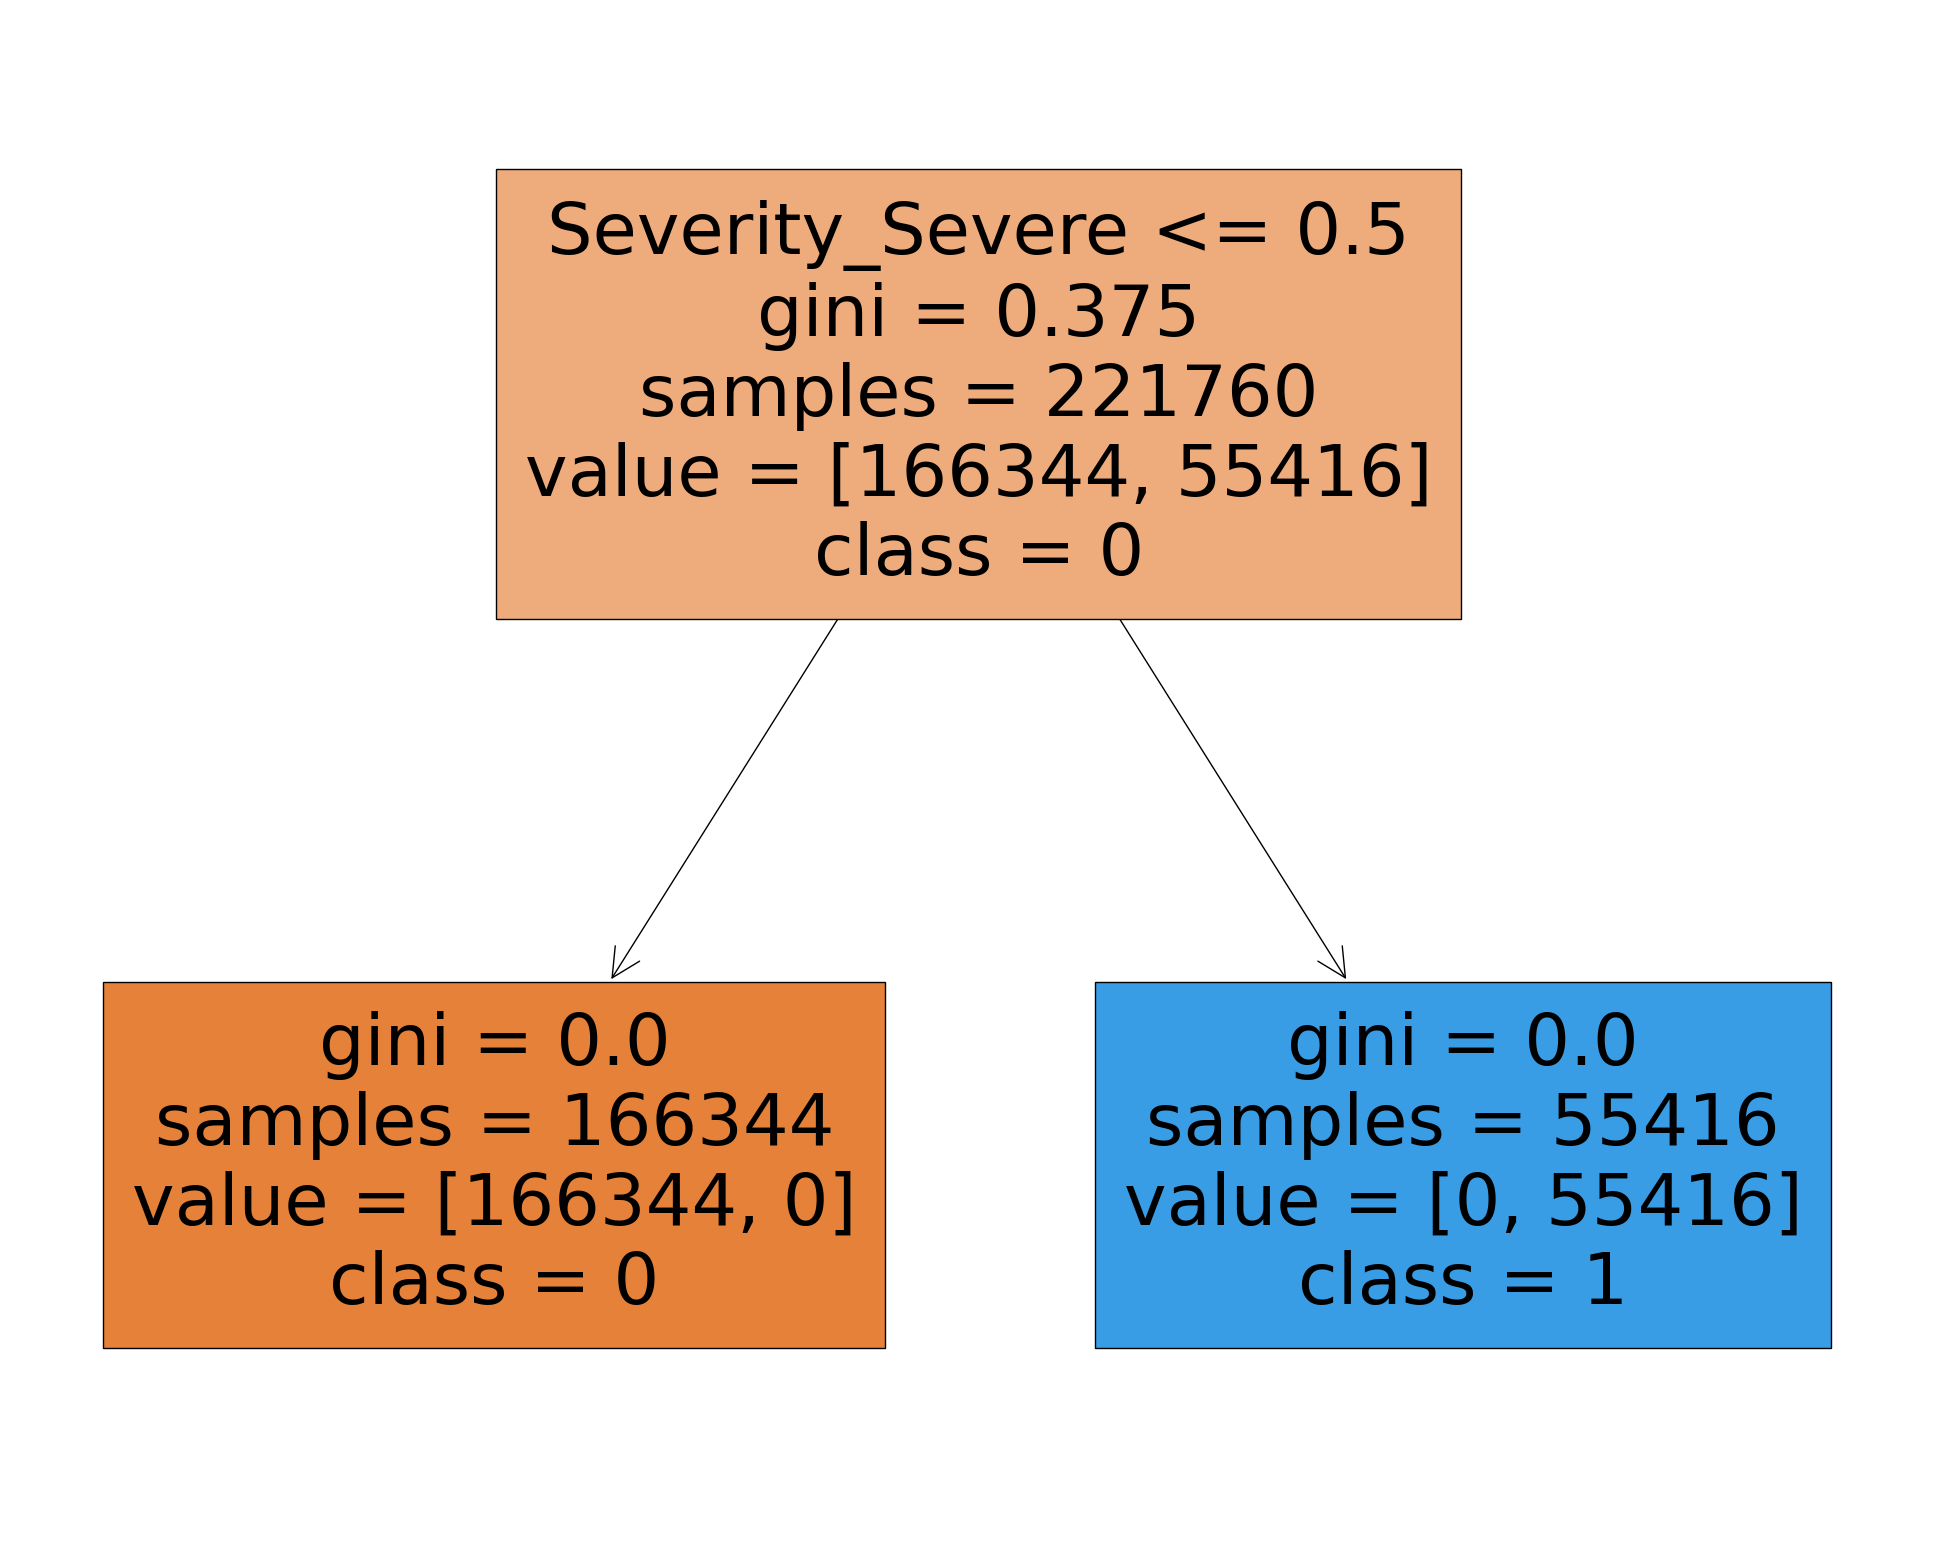

In [18]:
plt.figure(figsize=(25, 20))
plot_tree(arbol, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('arbol_desicion.png')

# KNN o vecinos cercanos

In [19]:
scores = {}
slist = []

for i in range(1,5):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    scores[i] = accuracy_score(y_test, y_pred_knn)
    slist.append(accuracy_score(y_test, y_pred_knn))

scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}

In [20]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred_knn = model_knn.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



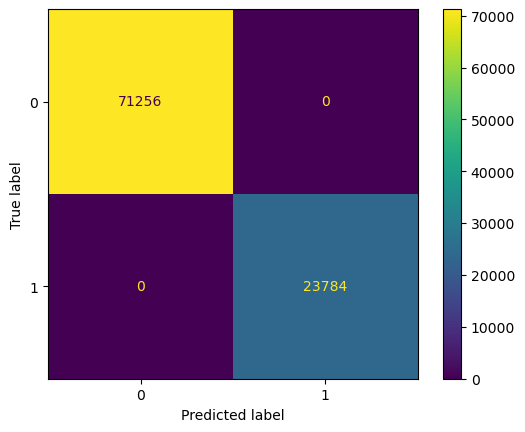

In [24]:
perform(y_pred_knn)

In [25]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040



# Gaussian Naive Bayes

In [26]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred_nb = model_nb.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



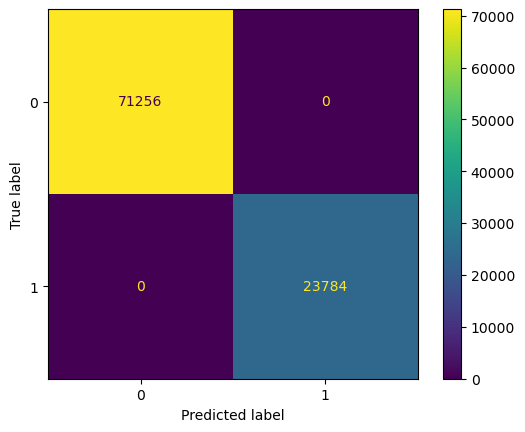

In [28]:
perform(y_pred_nb)

In [29]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040

